# Residual Plot

Plot the residuals for the out of sample data sets for quiet and storm times.

In [1]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os
import pickle


In [3]:
def oos_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of sample datasets from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    oos_a = pd.DataFrame( )
    oos_b = pd.DataFrame( )

    # read in the data
    for mod in dmod:
        
        with open(ddir+f'{mod}_RFdat.pkl','rb') as f:
            print(f)
            dat_a, dat_b = pickle.load(f)[4:]
            dat_a = dat_a[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_a['Model'] = mod
            dat_b = dat_b[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
            dat_b['Model'] = mod
    
        oos_a = pd.concat([oos_a,dat_a])
        oos_b = pd.concat([oos_b,dat_b])

    # calculate residuals
    oos_a['resid'] = oos_a['400kmDensity'] - oos_a['400kmDensity_pred']
    oos_b['resid'] = oos_b['400kmDensity'] - oos_b['400kmDensity_pred']

    # calculate the desnity ratio
    oos_a['ratio'] = oos_a['400kmDensity_pred'] / oos_a['400kmDensity']
    oos_b['ratio'] = oos_b['400kmDensity_pred'] / oos_b['400kmDensity'] 
    
    return oos_a, oos_b


In [4]:
#read in data
oos_ga, oos_ch = oos_dat( ) # grace A and CHAMP out of sample data

#define the data subsets
ga_qt = oos_ga['storm'] < 0 # quiet time data
ga_st = oos_ga['storm'] > 0 # storm time data
ga_si = oos_ga['Model'] == 'SI' # solar model
ga_fi = oos_ga['Model'] == 'FI' # FISM model
ga_fg = oos_ga['Model'] == 'FI_GEO' # FISM/GEO model

ch_qt = oos_ch['storm'] < 0 # quiet time data
ch_st = oos_ch['storm'] > 0 # storm time data
ch_si = oos_ch['Model'] == 'SI' # solar model
ch_fi = oos_ch['Model'] == 'FI' # FISM model
ch_fg = oos_ch['Model'] == 'FI_GEO' # FISM/GEO model

<_io.BufferedReader name='D:/data/SatDensities/SI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_GEO_RFdat.pkl'>


In [5]:
# reset so only last call comes out
InteractiveShell.ast_node_interactivity = "last"

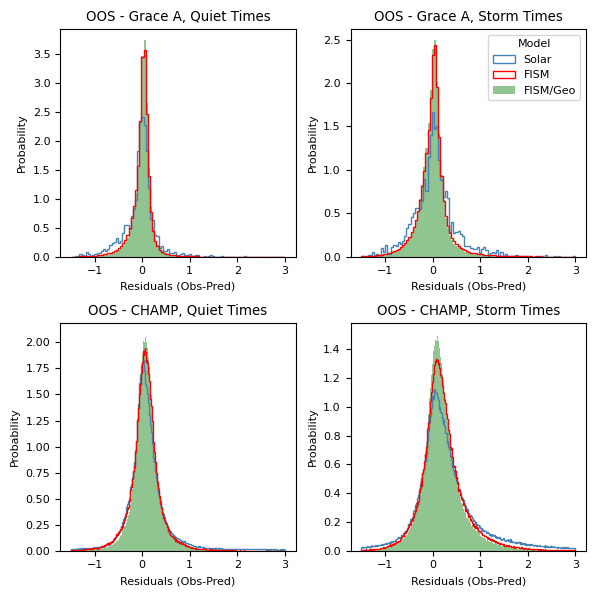

In [16]:
cumulative = False
hmin = -1.5
hmax = 3

hbins_ga = np.histogram_bin_edges(oos_ga.loc[ga_si, 'resid'],bins='fd',range=(hmin,hmax))
hbins_ch = np.histogram_bin_edges(oos_ch.loc[ch_si, 'resid'],bins='fd',range=(hmin,hmax))

density=True

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(2,2, figsize=(6,6))

# Grace A
ax[0,0].hist(oos_ga.loc[ga_qt & ga_si,'resid'],bins=hbins_ga, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[0,0].hist(oos_ga.loc[ga_qt & ga_fi,'resid'],bins=hbins_ga, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[0,0].hist(oos_ga.loc[ga_qt & ga_fg,'resid'],bins=hbins_ga, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[0,0].set(title='OOS - Grace A, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[0,1].hist(oos_ga.loc[ga_st & ga_si,'resid'],bins=hbins_ga, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[0,1].hist(oos_ga.loc[ga_st & ga_fi,'resid'],bins=hbins_ga, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[0,1].hist(oos_ga.loc[ga_st & ga_fg,'resid'],bins=hbins_ga, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[0,1].set(title='OOS - Grace A, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

# CHAMP
ax[1,0].hist(oos_ch.loc[ch_qt & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[1,0].hist(oos_ch.loc[ch_qt & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[1,0].hist(oos_ch.loc[ch_qt & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[1,0].set(title='OOS - CHAMP, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[1,1].hist(oos_ch.loc[ch_st & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[1,1].hist(oos_ch.loc[ch_st & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[1,1].hist(oos_ch.loc[ch_st & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[1,1].set(title='OOS - CHAMP, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[0,1].legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax[0,1].get_legend().set_title("Model")

plt.tight_layout()
fig.savefig('C:/Users/krmurph1/OneDrive/SatDrag_RF/Resid_Hist.png', dpi=300, format='png')

In [7]:
ga_oc_qt_fg = np.exp(np.mean(np.log(oos_ga.loc[ga_qt & ga_fg,'ratio'])))
ga_oc_st_fg = np.exp(np.mean(np.log(oos_ga.loc[ga_st & ga_fg,'ratio'])))

ga_oc_qt_fi = np.exp(np.mean(np.log(oos_ga.loc[ga_qt & ga_fi,'ratio'])))
ga_oc_st_fi = np.exp(np.mean(np.log(oos_ga.loc[ga_st & ga_fi,'ratio'])))

ga_oc_qt_si = np.exp(np.mean(np.log(oos_ga.loc[ga_qt & ga_si,'ratio'])))
ga_oc_st_si = np.exp(np.mean(np.log(oos_ga.loc[ga_st & ga_si,'ratio'])))


ga_oc_qt_fg, ga_oc_st_fg 
ga_oc_qt_fi, ga_oc_st_fi 
ga_oc_qt_si, ga_oc_st_si


(1.0610131603908728, 0.997813249384143)

In [21]:
def metric_msa(dat):
    '''
    Calculate Median Symmetric Accuracy 

    '''  
    return np.exp(np.mean((np.log(1/dat))))
    #return 100*(np.exp(np.median(np.abs(np.log(dat))))-1)

def metric_sspb(dat):
    ''' 
    Calculate Symmetric Signed Percentage Bias
    '''

    mdlq = np.median(np.log(dat))
    sspb = 100*np.sign(mdlq)*(np.exp(np.abs(mdlq))-1)

    return sspb

In [22]:
ch_oc_al_fg = metric_msa(oos_ch.loc[ch_fg,'ratio'])
ch_oc_qt_fg = metric_msa(oos_ch.loc[ch_qt & ch_fg,'ratio'])
ch_oc_st_fg = metric_msa(oos_ch.loc[ch_st & ch_fg,'ratio'])

ch_oc_al_fi = metric_msa(oos_ch.loc[ch_fi,'ratio'])
ch_oc_qt_fi = metric_msa(oos_ch.loc[ch_qt & ch_fi,'ratio'])
ch_oc_st_fi = metric_msa(oos_ch.loc[ch_st & ch_fi,'ratio'])

ch_oc_al_si = metric_msa(oos_ch.loc[ch_si,'ratio'])
ch_oc_qt_si = metric_msa(oos_ch.loc[ch_qt & ch_si,'ratio'])
ch_oc_st_si = metric_msa(oos_ch.loc[ch_st & ch_si,'ratio'])


print(ch_oc_al_fg, ch_oc_qt_fg, ch_oc_st_fg)
print(ch_oc_al_fi, ch_oc_qt_fi, ch_oc_st_fi)
print(ch_oc_al_si, ch_oc_qt_si, ch_oc_st_si)



1.1184082021873454 1.1065551045672604 1.1278299583305995
1.1103845663280447 1.0619229876968888 1.1500917498097756
1.1043960473758256 1.0453838683303869 1.1505007044531486


In [10]:
ch_ss_al_fg = metric_sspb(oos_ch.loc[ch_fg,'ratio'])
ch_ss_qt_fg = metric_sspb(oos_ch.loc[ch_qt & ch_fg,'ratio'])
ch_ss_st_fg = metric_sspb(oos_ch.loc[ch_st & ch_fg,'ratio'])

ch_ss_al_fi = metric_sspb(oos_ch.loc[ch_fi,'ratio'])
ch_ss_qt_fi = metric_sspb(oos_ch.loc[ch_qt & ch_fi,'ratio'])
ch_ss_st_fi = metric_sspb(oos_ch.loc[ch_st & ch_fi,'ratio'])

ch_ss_al_si = metric_sspb(oos_ch.loc[ch_si,'ratio'])
ch_ss_qt_si = metric_sspb(oos_ch.loc[ch_qt & ch_si,'ratio'])
ch_ss_st_si = metric_sspb(oos_ch.loc[ch_st & ch_si,'ratio'])

print(ch_ss_al_fg, ch_ss_qt_fg, ch_ss_st_fg)
print(ch_ss_al_fi, ch_ss_qt_fi, ch_ss_st_fi)
print(ch_ss_al_si, ch_ss_qt_si, ch_ss_st_si)



-13.913091050920446 -13.598833425392431 -14.115817645105233
-13.031000524253455 -9.518182609374847 -15.468188184249865
-12.644030629977054 -7.879564354718571 -16.159095238294242


In [19]:

print(metric_msa(oos_ch.loc[ch_fg,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_fg,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))
print(metric_msa(oos_ch.loc[ch_fi,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_fi,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))
print(metric_msa(oos_ch.loc[ch_si,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_si,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))


0.8739611069885957
0.8803065025266137
0.8775990021817041
